In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.1'

In [3]:
keras.__version__

'2.4.0'

#### Fashion MNIST, which is a drop-in replacement of MNIST (the one with digits). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, and the California housing dataset that used in this repo already

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [5]:
X_train_full.shape, X_train_full.ndim, X_train_full.dtype

((60000, 28, 28), 3, dtype('uint8'))

In [6]:
X_train_full[6578]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0, 122, 151,
        142, 135, 123, 102,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   1,   1,   1,   1,   1,   0,   3,   0, 139, 255, 222,
        206, 204, 197, 237, 149,   0,   6,   1,   1,   0,   0,   1,   2,
          0,   0],
       [  1,   0,   0,   1,   3,   0,   0,   2,   2,   0, 183, 191, 221,
        209, 210, 194, 200, 158,   0,   2,   5,   2,   0,   0,   0,   1,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   3,   0,   0,  95, 244, 191, 162,
        179, 145, 146, 149, 191,  49,   0,   1,   1,   1,   0,   1,   0,
          0,   0],
       [  1,   1,   0,   0,   1,   1,   0,   0,  52, 230, 232, 238, 203,
        181, 197, 199, 180, 194, 184,  68,  19,   0,   0,   2,   1,   1,
          0,   0],
       [  

The dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [9]:
X_train[1578]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.47843137, 0.59215686, 0.55686275, 0.52941176,
        0.48235294, 0.4       , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.        , 0.01176471, 0.        ,
        0.54509804, 1.        , 0.87058824, 0.80784314, 0.8       ,
        0.77254902, 0.9294

In [10]:
y_train[1578]

4

For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents a coat:

In [12]:
class_names[y_train[0]]

'Coat'

## Creating the model using the Sequential API
Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [13]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
model.add(keras.layers.Dense(300, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax"))

Instead of adding the layers one by one, we can pass a list of layers when creating the Sequential model:
<code>
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.Dense(10, activation="softmax")
])
</code>

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


use keras.utils.plot_model() to generate an image of the model

Getting a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer('dense') is hidden1

True

#### All the parameters of a layer can be accessed using its get_weights() and set_weights() methods. For a Dense layer, this includes both the connection weights and the bias terms.
###  Dense layer initialized the connection weights randomly (which is needed to break symmetry) and the biases were initialized to zeros, which is fine.

In [18]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[ 0.03740596, -0.07134952, -0.02790457, ..., -0.02713716,
          0.06956549, -0.0273296 ],
        [-0.03824829,  0.01302815,  0.03276797, ...,  0.04169557,
          0.05005378,  0.05799212],
        [ 0.04177456, -0.01049006, -0.04636629, ..., -0.00187402,
          0.03539606, -0.05769937],
        ...,
        [ 0.04375726, -0.0272113 ,  0.01437823, ..., -0.02253415,
          0.03821181,  0.00518186],
        [-0.05283237, -0.02489524, -0.05724452, ..., -0.01835712,
          0.02636572, -0.05109601],
        [ 0.04878578, -0.02228304,  0.05214272, ..., -0.06615808,
          0.02925531, -0.04361004]], dtype=float32), (784, 300))

In [19]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

### Compiling the Model
After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7214 - accuracy: 0.7635 - val_loss: 0.5624 - val_accuracy: 0.8042
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4921 - accuracy: 0.8279 - val_loss: 0.4814 - val_accuracy: 0.8286
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4453 - accuracy: 0.8440 - val_loss: 0.4270 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4181 - accuracy: 0.8533 - val_loss: 0.3970 - val_accuracy: 0.8690
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3983 - accuracy: 0.8609 - val_loss: 0.3977 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3811 - accuracy: 0.8660 - val_loss: 0.3885 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3678 - accuracy: 0.8696 - val_loss: 0.3973 - val_accuracy:

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and
most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

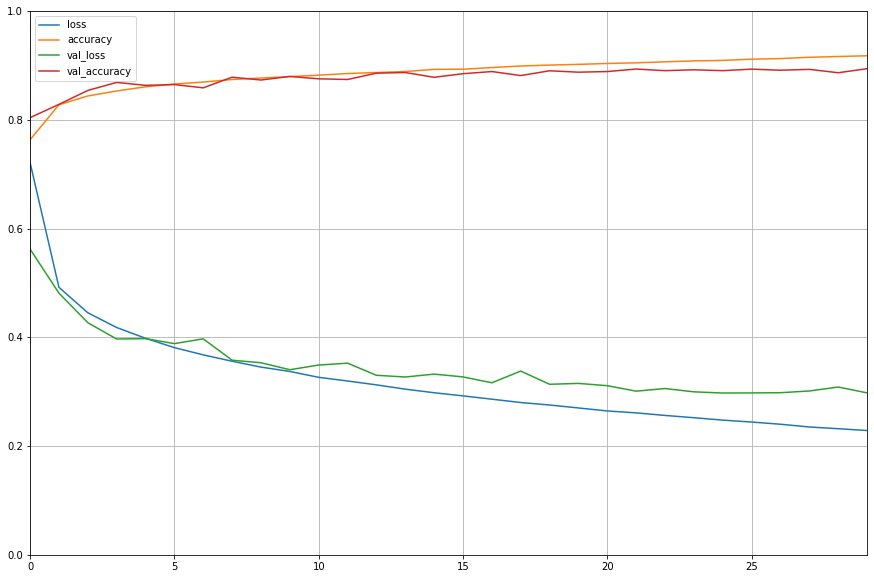

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

Learning curves: the mean training loss and accuracy measured over each epoch, + mean validation loss and accuracy measured at the end of each epoch

Good! The validation curves are close to the training curves, which means that there is not too much overfitting


#### Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before  deploying the model to production. 

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 73.1706 - accuracy: 0.8324


[73.17060852050781, 0.8324000239372253]

### Using the model to make predictions

Since we don’t have actual new instances, we will just use the first three instances of the test set:

In [24]:
X_new = X_test[:3]

y_proba = model.predict(X_new)

#### As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 100%

In [25]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# X_new has three images
X_new.shape

(3, 28, 28)

In [27]:
y_proba.shape

(3, 10)

If we only care about the class with the highest estimated probability (even if that probability is quite low), then we can use the predict_classes() method instead:

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [29]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

#### Images classified (correctly) :

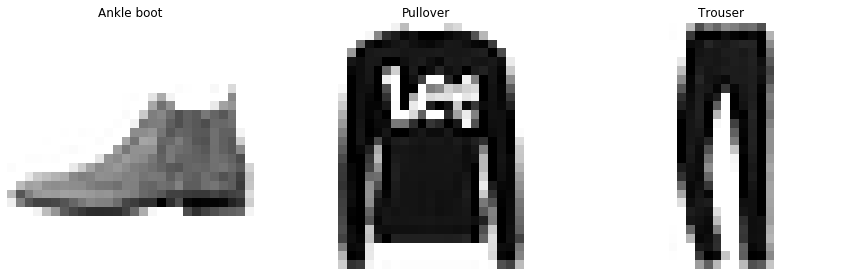

In [30]:
plt.figure(figsize=(15, 10))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

Let’s use the California housing problem and tackle it using a regression neural network. There is Scikit-Learn’s fetch_california_housing() function to load the data. This dataset contains only numerical features (there is no ocean_proximity feature), and there is no missing value.

In [31]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [32]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [34]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)

In [36]:
X_train.shape, X_valid.shape, y_train.shape

((11610, 8), (3870, 8), (11610,))

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-0.68533283,  1.53885586, -0.06986796, ...,  0.48101283,
        -0.72969416,  1.10858731],
       [ 0.75943072,  0.27101357,  0.14952906, ..., -0.39018975,
        -0.62251387,  0.14158181],
       [-0.44521115,  1.85581643, -0.58421422, ...,  1.50292547,
         1.00383053, -1.33384927],
       ...,
       [ 1.3865548 , -0.600628  , -0.01637247, ...,  0.64215132,
         0.82675006, -1.14942038],
       [-0.58575358,  0.35025372,  0.24890819, ...,  0.79874653,
        -0.72969416,  1.03880341],
       [-1.4023454 ,  0.82569457, -0.65505544, ...,  1.03765089,
        -0.76231424,  0.57025435]])

In [39]:
X_train_full

array([[   5.163     ,   24.        ,    5.5       , ...,    2.60570825,
          33.72      , -118.03      ],
       [   6.3303    ,   16.        ,    8.28761062, ...,    3.44247788,
          34.17      , -118.94      ],
       [   7.3732    ,   16.        ,    7.19952494, ...,    2.58194774,
          37.88      , -122.02      ],
       ...,
       [   5.8479    ,   25.        ,    6.61155378, ...,    3.10756972,
          37.26      , -121.89      ],
       [   2.9432    ,   52.        ,    4.94945848, ...,    3.55956679,
          33.98      , -118.3       ],
       [   3.049     ,   33.        ,    3.17123288, ...,    2.22450533,
          37.7       , -122.48      ]])

Since the dataset is quite noisy, let's use a single hidden layer with fewer neurons than before, to avoid overfitting:


In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1)
])

In [41]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [44]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 0s 647us/step - loss: 0.3317 - val_loss: 0.3506
Epoch 2/30
363/363 [==============================] - 0s 497us/step - loss: 0.3295 - val_loss: 0.4312
Epoch 3/30
363/363 [==============================] - 0s 497us/step - loss: 0.3296 - val_loss: 0.3779
Epoch 4/30
363/363 [==============================] - 0s 491us/step - loss: 0.3236 - val_loss: 0.4152
Epoch 5/30
363/363 [==============================] - 0s 514us/step - loss: 0.3218 - val_loss: 0.3824
Epoch 6/30
363/363 [==============================] - 0s 498us/step - loss: 0.3218 - val_loss: 0.3640
Epoch 7/30
363/363 [==============================] - 0s 489us/step - loss: 0.3204 - val_loss: 0.3877
Epoch 8/30
363/363 [==============================] - 0s 495us/step - loss: 0.3188 - val_loss: 0.3642
Epoch 9/30
363/363 [==============================] - 0s 500us/step - loss: 0.3173 - val_loss: 0.3414
Epoch 10/30
363/363 [==============================] - 0s 501us/step - loss: 0.315

In [45]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 456us/step - loss: 0.3793


In [46]:
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)

In [51]:
y_pred

array([[3.318112 ],
       [0.7424892],
       [1.8027854]], dtype=float32)

In [53]:
y_test[:3]

array([3.353, 0.783, 1.468])

## Building Complex Models Using the Functional API
such a neural network to tackle the California housing problem:

In [54]:
X_train.shape[1:]

(8,)

In [57]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) 
concat = keras.layers.Concatenate()([input_, hidden2]) 
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [58]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 0s 801us/step - loss: 0.9875 - val_loss: 0.4611
Epoch 2/30
363/363 [==============================] - 0s 553us/step - loss: 0.4588 - val_loss: 0.5085
Epoch 3/30
363/363 [==============================] - 0s 526us/step - loss: 0.4283 - val_loss: 0.4125
Epoch 4/30
363/363 [==============================] - 0s 583us/step - loss: 0.3755 - val_loss: 0.4220
Epoch 5/30
363/363 [==============================] - 0s 580us/step - loss: 0.3727 - val_loss: 0.3787
Epoch 6/30
363/363 [==============================] - 0s 548us/step - loss: 0.3631 - val_loss: 0.3831
Epoch 7/30
363/363 [==============================] - 0s 528us/step - loss: 0.3491 - val_loss: 0.4006
Epoch 8/30
363/363 [==============================] - 0s 527us/step - loss: 0.3489 - val_loss: 0.3783
Epoch 9/30
363/363 [==============================] - 0s 529us/step - loss: 0.3414 - val_loss: 0.3665
Epoch 10/30
363/363 [==============================] - 0s 529us/step - loss: 0.336

In [60]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 492us/step - loss: 2.9835


In [61]:
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)
y_pred

array([[3.2734041 ],
       [0.83464354],
       [1.849524  ]], dtype=float32)

#### Using multiple inputs to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path. For example, suppose we want to send five features through the wide path (features 0 - 4), six features through the deep path (features 2 - 7)

In [62]:
input_A = keras.layers.Input(shape=[5], name="wide_input") 
input_B = keras.layers.Input(shape=[6], name="deep_input") 
hidden1 = keras.layers.Dense(30, activation="relu")(input_B) 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) 
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [64]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [65]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 752us/step - loss: 2.6536 - val_loss: 0.8823
Epoch 2/20
363/363 [==============================] - 0s 552us/step - loss: 0.6632 - val_loss: 0.6117
Epoch 3/20
363/363 [==============================] - 0s 557us/step - loss: 0.5517 - val_loss: 0.5480
Epoch 4/20
363/363 [==============================] - 0s 556us/step - loss: 0.5144 - val_loss: 0.5184
Epoch 5/20
363/363 [==============================] - 0s 547us/step - loss: 0.4913 - val_loss: 0.5011
Epoch 6/20
363/363 [==============================] - 0s 545us/step - loss: 0.4744 - val_loss: 0.4882
Epoch 7/20
363/363 [==============================] - 0s 554us/step - loss: 0.4613 - val_loss: 0.4788
Epoch 8/20
363/363 [==============================] - 0s 545us/step - loss: 0.4507 - val_loss: 0.4739
Epoch 9/20
363/363 [==============================] - 0s 540us/step - loss: 0.4440 - val_loss: 0.4701
Epoch 10/20
363/363 [==============================] - 0s 564us/step - loss: 0.435

In [66]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test) 

162/162 [==============================] - 0s 430us/step - loss: 1.1314


In [67]:
y_pred = model.predict((X_new_A, X_new_B))

In [69]:
y_pred, y_test[:3]

(array([[3.0941117],
        [0.9637629],
        [1.8426762]], dtype=float32), array([3.353, 0.783, 1.468]))

## Saving and Restoring a Model

In [70]:
model.save("my_functional_model.h5")

Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have).


### Loading the model

In [72]:
model = keras.models.load_model("my_functional_model.h5")

## Using TensorBoard for Visualization

In [73]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [74]:
def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

In [75]:
run_logdir = get_run_logdir()

In [76]:
X_train.shape, X_valid.shape, y_train.shape

((11610, 8), (3870, 8), (11610,))

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [84]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [85]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [86]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), 
                    callbacks=[tensorboard_cb])

Epoch 1/40
  1/363 [..............................] - ETA: 0s - loss: 6.2178WARNING:tensorflow:From /Users/paulmospan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 833us/step - loss: 1.3396 - val_loss: 0.5533
Epoch 2/40
363/363 [==============================] - 0s 550us/step - loss: 0.4411 - val_loss: 0.4256
Epoch 3/40
363/363 [==============================] - 0s 600us/step - loss: 0.3831 - val_loss: 0.3900
Epoch 4/40
363/363 [==============================] - 0s 657us/step - loss: 0.3649 - val_loss: 0.4221
Epoch 5/40
363/363 [==============================] - 0s 591us/step - loss: 0.3543 - val_loss: 0.3628
Epoch 6/40
363/363 [==============================] - 0s 748us/step - loss: 0.3454 - val_loss: 0.3761
Epoch 7/40
363/363 [====